In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
import random
from math import *
import sklearn as svm
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.svm import SVC

Data pre-analysis. Getting to know data a bit.

In [ ]:
car_sales = pd.read_csv('Car_sales.csv')
print(car_sales.head())

  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

Getting to know what data types we have and what columns

In [ ]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [ ]:
car_sales_dataframe = pd.DataFrame(car_sales)
car_sales_dataframe.info

<bound method DataFrame.info of     Manufacturer    Model  Sales_in_thousands  __year_resale_value  \
0          Acura  Integra              16.919               16.360   
1          Acura       TL              39.384               19.875   
2          Acura       CL              14.114               18.225   
3          Acura       RL               8.588               29.725   
4           Audi       A4              20.397               22.255   
..           ...      ...                 ...                  ...   
152        Volvo      V40               3.545                  NaN   
153        Volvo      S70              15.245                  NaN   
154        Volvo      V70              17.531                  NaN   
155        Volvo      C70               3.493                  NaN   
156        Volvo      S80              18.969                  NaN   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0      Passenger               21.50          1.8       140.0      101.2   
1      Passenger               28.40          3.2       225.0      108.1   
2      Passenger                 NaN          3.2       225.0      106.9   
3      Passenger               42.00          3.5       210.0      114.6   
4      Passenger               23.99          1.8       150.0      102.6   
..           ...                 ...          ...         ...        ...   
152    Passenger               24.40          1.9       160.0      100.5   
153    Passenger               27.50          2.4       168.0      104.9   
154    Passenger               28.80          2.4       168.0      104.9   
155    Passenger               45.50          2.3       236.0      104.9   
156    Passenger               36.00          2.9       201.0      109.9   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0     67.3   172.4        2.639           13.2             28.0      2/2/2012   
1     70.3   192.9        3.517           17.2             25.0      6/3/2011   
2     70.6   192.0        3.470           17.2             26.0      1/4/2012   
3     71.4   196.6        3.850           18.0             22.0     3/10/2011   
4     68.2   178.0        2.998           16.4             27.0     10/8/2011   
..     ...     ...          ...            ...              ...           ...   
152   67.6   176.6        3.042           15.8             25.0     9/21/2011   
153   69.3   185.9        3.208           17.9             25.0    11/24/2012   
154   69.3   186.2        3.259           17.9             25.0     6/25/2011   
155   71.5   185.7        3.601           18.5             23.0     4/26/2011   
156   72.1   189.8        3.600           21.1             24.0    11/14/2011   

     Power_perf_factor  
0            58.280150  
1            91.370778  
2                  NaN  
3            91.389779  
4            62.777639  
..                 ...  
152          66.498812  
153          70.654495  
154          71.155978  
155         101.623357  
156          85.735655  

[157 rows x 16 columns]>

In [ ]:
car_sales_dataframe.describe

<bound method NDFrame.describe of     Manufacturer    Model  Sales_in_thousands  __year_resale_value  \
0          Acura  Integra              16.919               16.360   
1          Acura       TL              39.384               19.875   
2          Acura       CL              14.114               18.225   
3          Acura       RL               8.588               29.725   
4           Audi       A4              20.397               22.255   
..           ...      ...                 ...                  ...   
152        Volvo      V40               3.545                  NaN   
153        Volvo      S70              15.245                  NaN   
154        Volvo      V70              17.531                  NaN   
155        Volvo      C70               3.493                  NaN   
156        Volvo      S80              18.969                  NaN   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0      Passenger               21.50          1.8       140.0      101.2   
1      Passenger               28.40          3.2       225.0      108.1   
2      Passenger                 NaN          3.2       225.0      106.9   
3      Passenger               42.00          3.5       210.0      114.6   
4      Passenger               23.99          1.8       150.0      102.6   
..           ...                 ...          ...         ...        ...   
152    Passenger               24.40          1.9       160.0      100.5   
153    Passenger               27.50          2.4       168.0      104.9   
154    Passenger               28.80          2.4       168.0      104.9   
155    Passenger               45.50          2.3       236.0      104.9   
156    Passenger               36.00          2.9       201.0      109.9   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0     67.3   172.4        2.639           13.2             28.0      2/2/2012   
1     70.3   192.9        3.517           17.2             25.0      6/3/2011   
2     70.6   192.0        3.470           17.2             26.0      1/4/2012   
3     71.4   196.6        3.850           18.0             22.0     3/10/2011   
4     68.2   178.0        2.998           16.4             27.0     10/8/2011   
..     ...     ...          ...            ...              ...           ...   
152   67.6   176.6        3.042           15.8             25.0     9/21/2011   
153   69.3   185.9        3.208           17.9             25.0    11/24/2012   
154   69.3   186.2        3.259           17.9             25.0     6/25/2011   
155   71.5   185.7        3.601           18.5             23.0     4/26/2011   
156   72.1   189.8        3.600           21.1             24.0    11/14/2011   

     Power_perf_factor  
0            58.280150  
1            91.370778  
2                  NaN  
3            91.389779  
4            62.777639  
..                 ...  
152          66.498812  
153          70.654495  
154          71.155978  
155         101.623357  
156          85.735655  

[157 rows x 16 columns]>

Getting to know basic distributions with the data

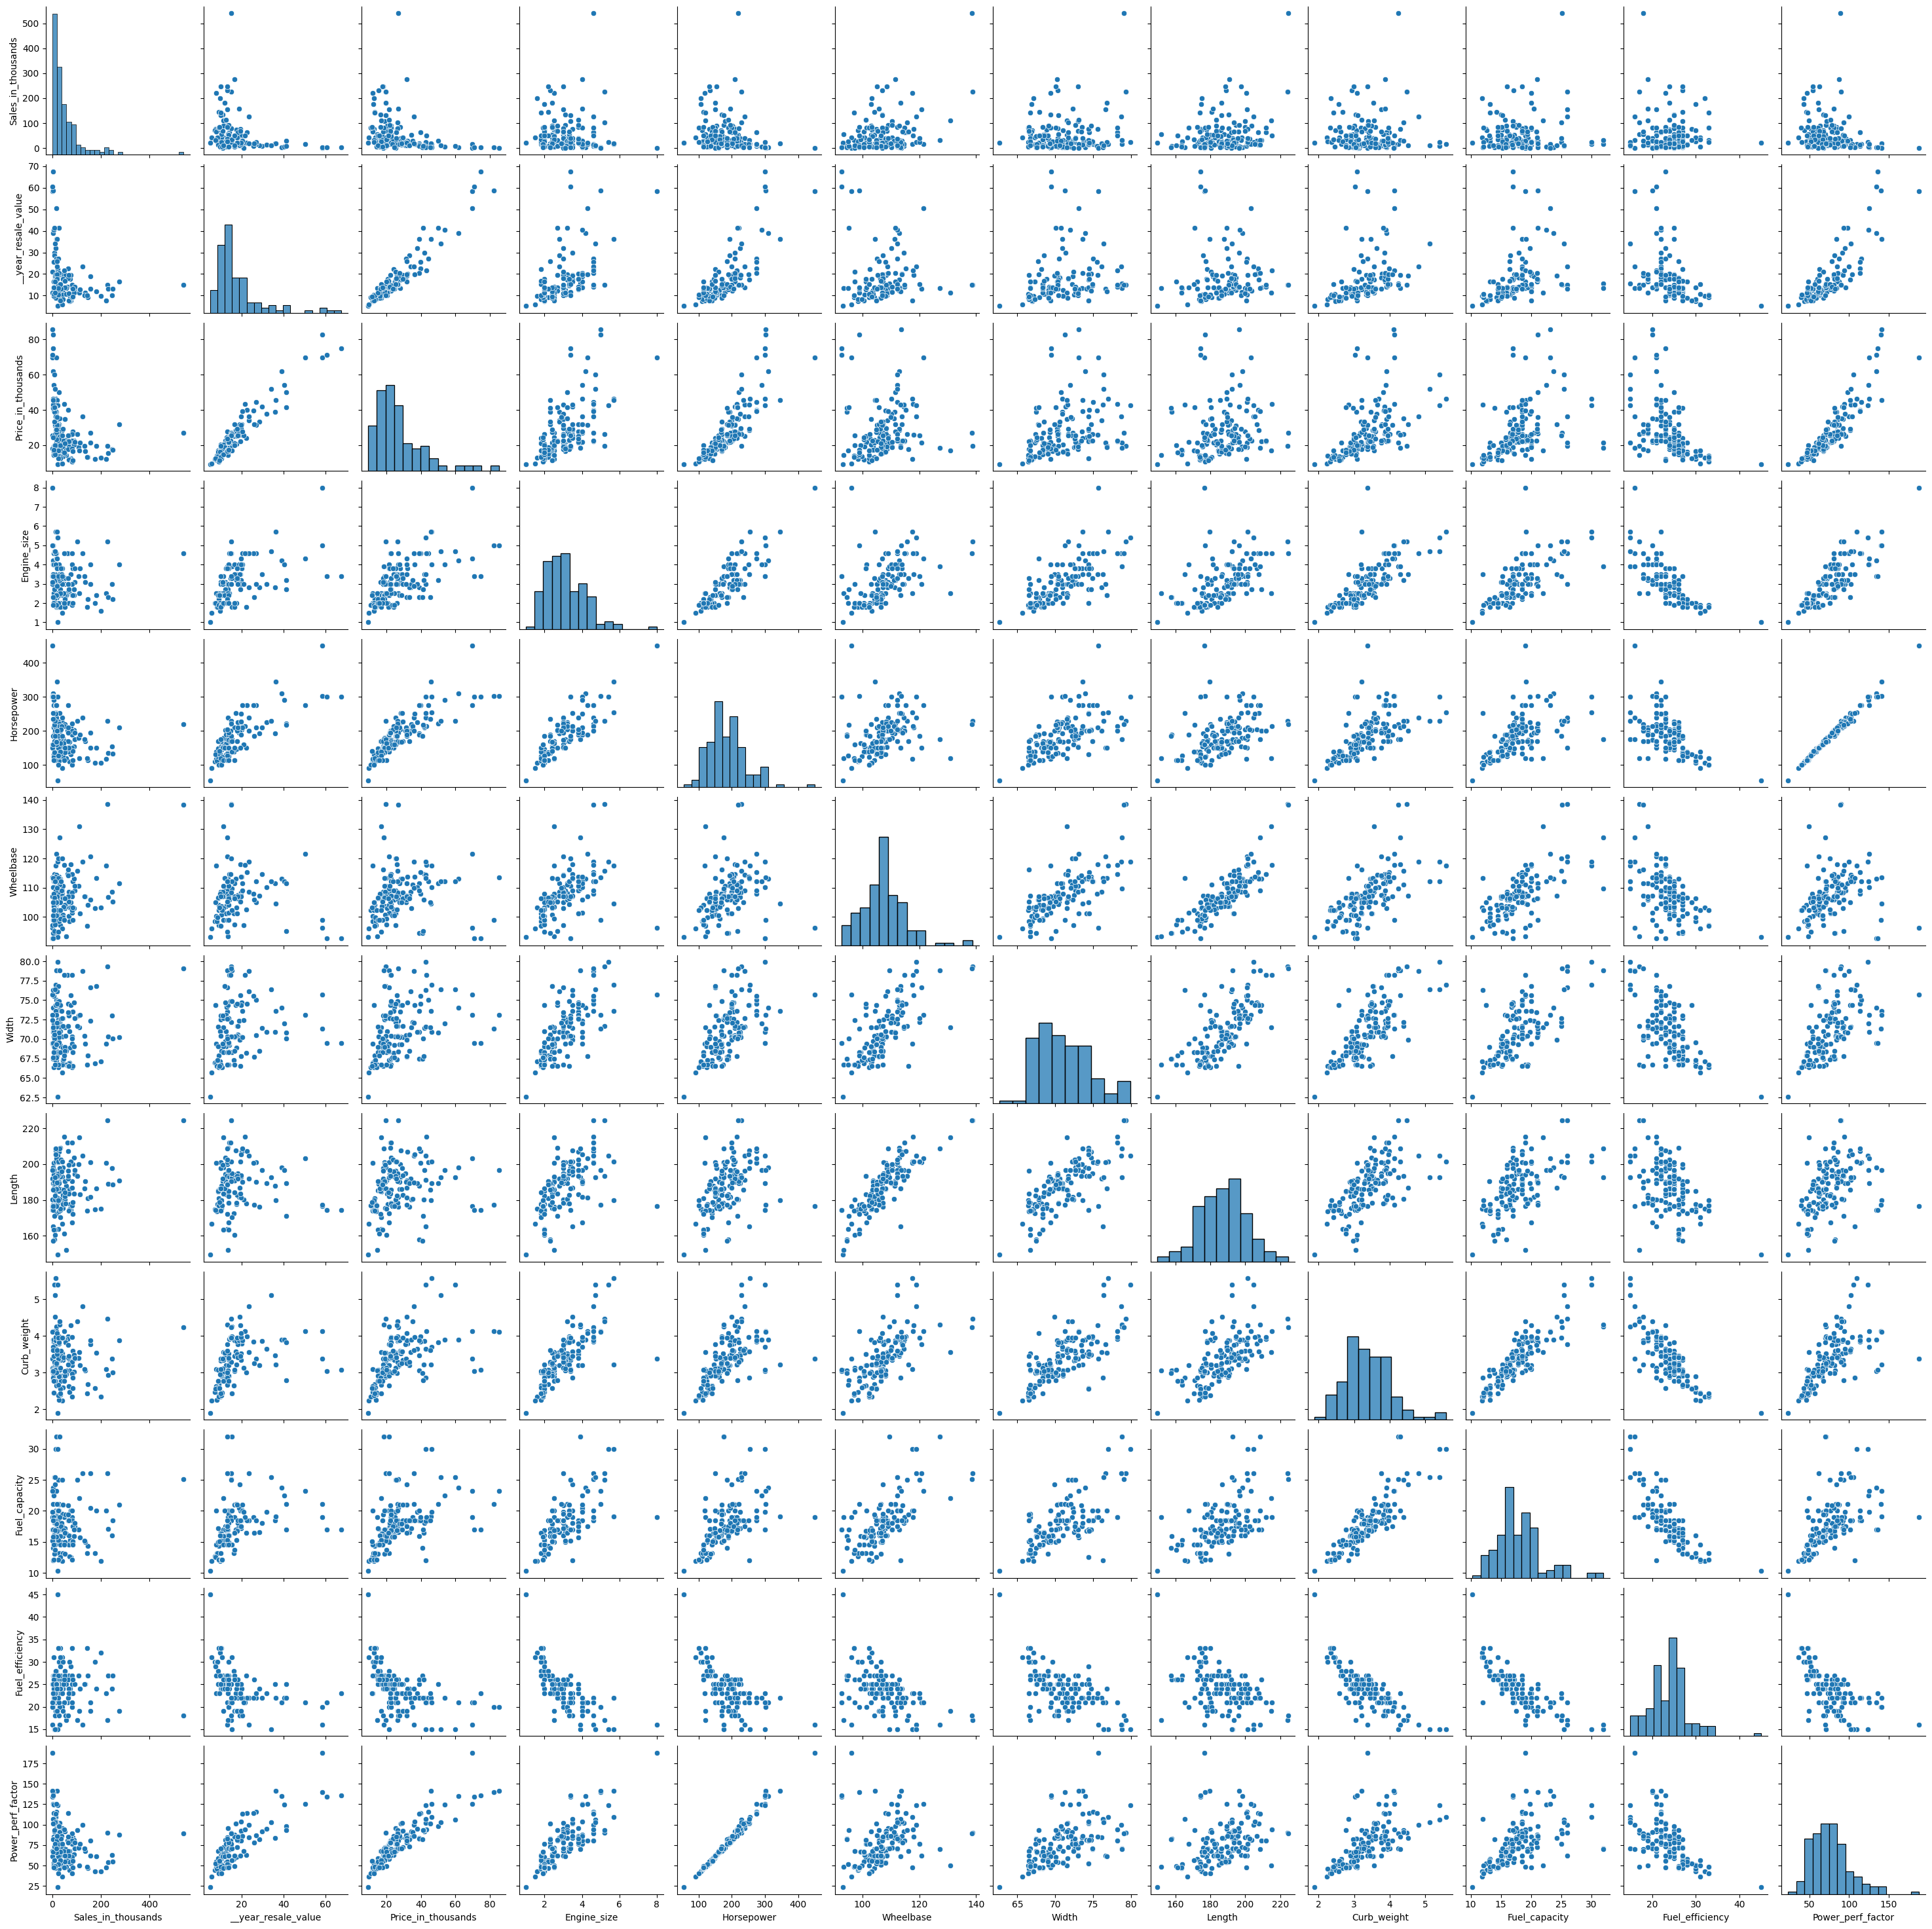

In [ ]:
sns.pairplot(car_sales_dataframe)

Getting to know the model and sales in thousands in total

Text(0, 0.5, 'Sales in thousands')

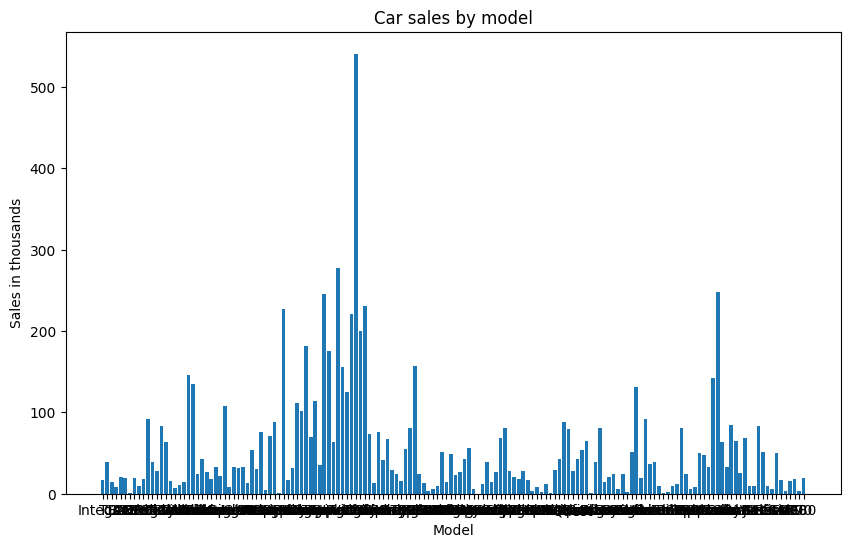

In [ ]:
car_models = car_sales_dataframe['Model']
car_sales_in_thousands = car_sales_dataframe['Sales_in_thousands']
plt.figure(figsize=(10, 6))
plt.bar(car_models, car_sales_in_thousands)
plt.title("Car sales by model")
plt.xlabel("Model")
plt.ylabel("Sales in thousands")

Comparing horsepower and enginesize of Audi and Toyota

Comparing horsepower and power performance factor of Audi and Toyota

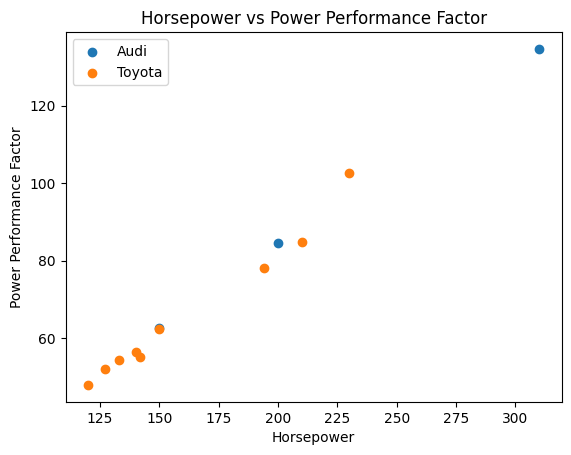

In [ ]:
horsepower_audi = car_sales_dataframe[car_sales_dataframe['Manufacturer'] == 'Audi']['Horsepower']
horsepower_toyota = car_sales_dataframe[car_sales_dataframe['Manufacturer'] == 'Toyota']['Horsepower']
performance_factor_audi = car_sales_dataframe[car_sales_dataframe['Manufacturer'] == 'Audi']['Power_perf_factor']
performance_factor_toyota = car_sales_dataframe[car_sales_dataframe['Manufacturer'] == 'Toyota']['Power_perf_factor']

plt.scatter(horsepower_audi, performance_factor_audi, label='Audi')
plt.scatter(horsepower_toyota, performance_factor_toyota, label='Toyota')
plt.xlabel('Horsepower')
plt.ylabel('Power Performance Factor')
plt.title('Horsepower vs Power Performance Factor')
plt.legend(loc = "upper left")
plt.show()

Horsepower vs Engine size of Acura and Toyota

In [ ]:
horsepower_acura = car_sales_dataframe[car_sales_dataframe['Manufacturer'] == 'Acura']['Horsepower']
engine_size_acura = car_sales_dataframe[car_sales_dataframe['Manufacturer'] == 'Acura']['Engine_size']
horsepower_toyota = car_sales_dataframe[car_sales_dataframe['Manufacturer'] == 'Toyota']['Horsepower']
engine_size_toyota = car_sales_dataframe[car_sales_dataframe['Manufacturer'] == 'Toyota']['Engine_size']

1. Scatter plot

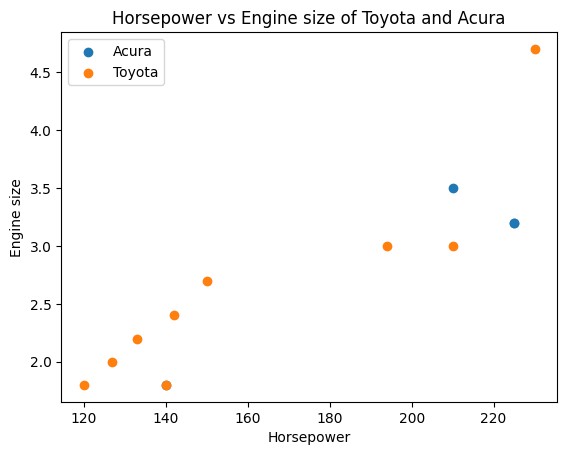

In [ ]:
plt.scatter(horsepower_acura, engine_size_acura, label='Acura')
plt.scatter(horsepower_toyota, engine_size_toyota, label='Toyota')
plt.xlabel('Horsepower')
plt.ylabel('Engine size')
plt.title('Horsepower vs Engine size of Toyota and Acura')
plt.legend()
plt.show()

2. Histogram

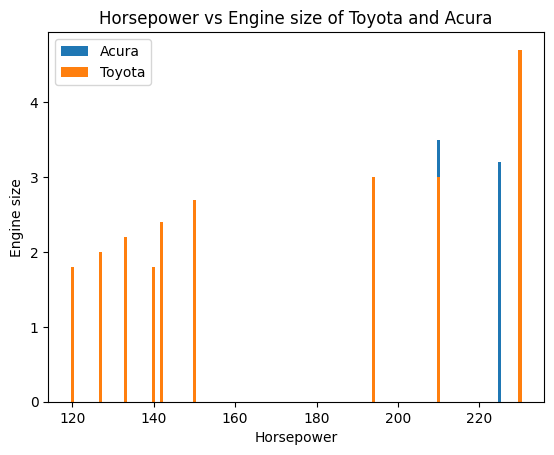

In [ ]:
plt.bar(horsepower_acura, engine_size_acura, label='Acura')
plt.bar(horsepower_toyota, engine_size_toyota, label='Toyota')
plt.xlabel('Horsepower')
plt.ylabel('Engine size')
plt.title('Horsepower vs Engine size of Toyota and Acura')
plt.legend()
plt.show()